In [93]:
from sympy import symbols, factor
# 从sympy中导入symbols, factor symbols 用来定义符号变量，factor 用来完成因式分解
from sympy import init_printing
import numpy as np
import matplotlib.pyplot as plt

## SymPy 符号运算
◄ sympy.abc import x 定义符号变量 x
◄ sympy.abc() 引入符号变量
◄ sympy.collect() 合并同类项
◄ sympy.cos() 符号运算中余弦
◄ sympy.diff() 求解符号导数和偏导解析式
◄ sympy.Eq() 定义符号等式
◄ sympy.evalf() 将符号解析式中未知量替换为具体数值
◄ sympy.exp() 符号自然指数
◄ sympy.expand() 展开代数式
◄ sympy.factor() 对代数式进行因式分解
◄ sympy.integrate() 符号积分
◄ sympy.is_decreasing() 判断符号函数的单调性
◄ sympy.lambdify() 将符号表达式转化为函数
◄ sympy.limit() 求解极限
◄ sympy.Matrix() 构造符号函数矩阵
◄ sympy.plot_implicit()绘制隐函数方程
◄ sympy.plot3d() 绘制函数的三维曲面
◄ sympy.series() 求解泰勒展开级数符号式
◄ sympy.simplify() 简化代数式
◄ sympy.sin() 符号运算中正弦
◄ sympy.solve() 求解符号方程组
◄ sympy.solve_linear_system() 求解含有符号变量的线型方程组
◄ sympy.symbols() 创建符号变量
◄ sympy.sympify() 化简符号函数表达式
◄ sympy.utilities.lambdify.lambdify() 将符号代数式转化为函数

### 1 什么是 SymPy?
SymPy 是一个基于 Python 的符号数学库，它可以执行代数运算、解方程、微积分、离散数学以及其他数学操作。

### 2 代数
因式分解

In [2]:
x, y = symbols('x y')
# 用sympy.symbols (简做symbols) 定义x和y两个符号变量
f = x ** 2 - y ** 2
f_factored = factor(f)
f_factored

(x - y)*(x + y)

In [3]:
from sympy import expand

f_expand = expand(f_factored)
f_expand

x**2 - y**2

替换

In [4]:
from sympy import sympify

str_expression = 'x**3 + x**2 + x + 1'
# 将字符串转化为符号表达式
str_2_sym = sympify(str_expression)
str_2_sym

x**3 + x**2 + x + 1

In [5]:
# 将符号x替换为y
str_2_sym.subs(x, y)

y**3 + y**2 + y + 1

In [6]:
# 将符号x替换为0
str_2_sym.subs(x, 0)

1

特殊符号数值

In [7]:
sympify(2).is_integer, sympify(2).is_real

(True, True)

In [8]:
from sympy import Rational

Rational(1, 2)

1/2

In [9]:
from sympy import sqrt

1 / (sqrt(2) + 1)

1/(1 + sqrt(2))

In [10]:
from sympy import pi

expr = pi ** 2
expr

pi**2

In [11]:
from sympy import exp

exp(2)

exp(2)

In [12]:
from sympy import factorial

factorial(5)

120

In [13]:
from sympy import binomial

binomial(5, 4)

5

In [14]:
from sympy import gamma

gamma(5)

24

 区间

In [17]:
from sympy import Interval, oo

Interval(0, 1, left_open=False, right_open=False)

(Interval(0, 1),
 Interval.open(0, 1),
 Interval.Ropen(0, 1),
 Interval.Lopen(0, 1))

In [16]:
Interval(0, 1, left_open=True, right_open=True)

Interval.open(0, 1)

In [18]:
Interval(0, 1, left_open=False, right_open=True)

Interval.Ropen(0, 1)

In [20]:
Interval(0, 1, left_open=True, right_open=False)

Interval.Lopen(0, 1)

In [21]:
Interval(0, oo, left_open=False, right_open=True)

Interval(0, oo)

In [23]:
Interval(-oo, 0, left_open=True, right_open=True)

Interval.open(-oo, 0)

In [24]:
from sympy import Interval, S

Interval(0, 1).complement(S.Reals)

Union(Interval.open(-oo, 0), Interval.open(1, oo))

In [25]:
Interval(0, 1) + Interval(1, 2)

Interval(0, 2)

In [26]:
intvl = Interval.Lopen(0, 1)
intvl.has(0)

True

求解等式


In [29]:
from sympy import symbols, solve, Eq

x = symbols('x')
# 定义等式 x**2 = 1
equation_1 = Eq(x ** 2, 1)
solve(equation_1, x)

[-1, 1]

In [28]:
a, b, c = symbols("a,b,c", real=True)
# 定义等式 a*x**2+b*x = -c
equation_2 = Eq(a * x ** 2 + b * x + c, 0)
solve(equation_2, x)

[(-b - sqrt(-4*a*c + b**2))/(2*a), (-b + sqrt(-4*a*c + b**2))/(2*a)]

函数

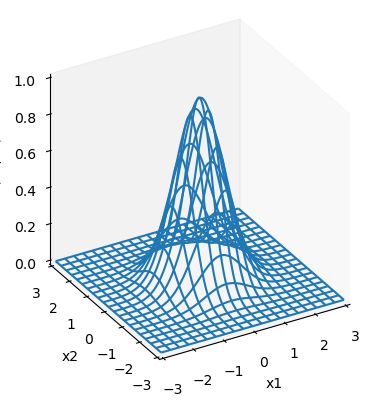

In [31]:
from sympy import symbols, exp, lambdify

x1, x2 = symbols('x1 x2')
# 定义符号变量
f_gaussian_x1x2 = exp(-x1 ** 2 - x2 ** 2)
# 将符号表达式转换为Python函数
f_gaussian_x1x2_fcn = lambdify([x1, x2], f_gaussian_x1x2)
# 用 lambdify 将符号函数转化为 Python 函数，从而可以进行数值运算。其中，[x1, x2] 指定了符号变量。
xx1, xx2 = np.meshgrid(np.linspace(-3, 3, 201), np.linspace(-3, 3, 201))
# meshgrid() 用于生成网格采样点矩阵
ff = f_gaussian_x1x2_fcn(xx1, xx2)
# 可视化
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_wireframe(xx1, xx2, ff, rstride=10, cstride=10)  # plot_wireframe 函数用来绘制线框图
ax.set_proj_type('ortho')
ax.view_init(azim=-120, elev=30)
ax.grid(False)
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('f(x1,x2)')
ax.set_xlim(-3, 3)
ax.set_ylim(-3, 3)
ax.set_zlim(0, 1)
ax.set_box_aspect(aspect=(1, 1, 1))
fig.savefig('二元高斯函数.svg', format='svg')

### 3 线性代数

In [35]:
from sympy import Matrix, shape

# 定义矩阵
A = Matrix([[1, 2, 3], [3, 2, 1]])
# 定义列向量
a = Matrix([1, 2, 3])
shape(A), shape(a), A.shape, a.shape

((2, 3), (3, 1), (2, 3), (3, 1))

In [42]:
from sympy import Matrix, symbols

A = Matrix(2, 2, symbols('a:d'))
A, A[0, 0], A[0, :], A.row(0), A[:, 0], A.col(0)
# A.row_del(0) 可以用来删除第 1 行元素。
# A.row_insert() 可以用来在特定位置插入行向量。
# A.col_del(0) 可以用来删除第 1 列元素。
# A.col_insert() 可以用来在特定位置插入列向量。

(Matrix([[d]]),
 a,
 Matrix([[a, b]]),
 Matrix([[a, b]]),
 Matrix([
 [a],
 [c]]),
 Matrix([
 [a],
 [c]]),
 None,
 None)

In [46]:
A = Matrix(2, 2, symbols('a:d'))
A

Matrix([
[a, b],
[c, d]])

A.is_symmetric() 判断矩阵 A 是否为对称阵 (symmetric matrix)。
A.is_diagonal() 判断矩阵 A 是否为对角阵 (diagonal matrix)。
A.is_lower() 判断矩阵 A 是否为下三角矩阵 (lower triangular matrix)。
A.is_upper() 判断矩阵 A 是否为上三角矩阵 (upper triangular matrix)。
A.is_square() 判断矩阵 A 是否为方阵 (square matrix)。
A.is_zero_matrix() 判断矩阵 A 是否为全 0 矩阵 (zero matrix)。
A.is_diagonalizable() 判断矩阵 A 是否为可对角化矩阵 (diagonalizable matrix)。
A.is_positive_definite() 判断矩阵 A 是否为正定矩阵 (positive definite matrix)。

In [62]:
from sympy import eye

A = eye(3)
A.is_symmetric(), A.is_zero_matrix()  # 判断矩阵 A 是否为对称阵  判断矩阵 A 是否为全 0 矩阵

True

In [61]:
from sympy import zeros

A = zeros(3, 3)
A.is_diagonal()

True

In [59]:
from sympy import ones

A = ones(3, 3)
A.is_diagonal()  # 对判断矩阵 A 是否为角阵

False

In [78]:
from sympy import diag

A = diag(1, 2, 3)
A.is_diagonalizable(), A.is_square

(True, True)

In [80]:
from sympy import ones

A = ones(3)
A.is_positive_definite

False

In [73]:
from sympy import ones

A = ones(3)
A.lower_triangular()
A.is_lower, A.is_upper

(False, False)

矩阵相关运算

In [84]:
from sympy import Matrix, symbols

A = Matrix([[1, 3], [-2, 3]])
B = Matrix([[0, 3], [0, 7]])
A, B, A.T, A + B, A - B, 3 * A

(Matrix([
 [ 1, 3],
 [-2, 3]]),
 Matrix([
 [0, 3],
 [0, 7]]),
 Matrix([
 [1, -2],
 [3,  3]]),
 Matrix([
 [ 1,  6],
 [-2, 10]]),
 Matrix([
 [ 1,  0],
 [-2, -4]]),
 Matrix([
 [ 3, 9],
 [-6, 9]]))

In [83]:
A.multiply_elementwise(B)  # 逐项积

Matrix([
[0,  9],
[0, 21]])

In [85]:
A * B, A @ B  # 矩阵乘法

(Matrix([
 [0, 24],
 [0, 15]]),
 Matrix([
 [0, 24],
 [0, 15]]))

In [86]:
Matrix_2x2 = Matrix([[1.25, -0.75],
                     [-0.75, 1.25]])
Matrix_2x2 ** -1, Matrix_2x2.inv()  # 矩阵逆

(Matrix([
 [1.25, 0.75],
 [0.75, 1.25]]),
 Matrix([
 [1.25, 0.75],
 [0.75, 1.25]]))

In [92]:
# 将符号矩阵转化为浮点数numpy数组
np.array(Matrix_2x2).astype(np.float64)

array([[ 1.25, -0.75],
       [-0.75,  1.25]])

In [91]:
a, b, c, d = symbols('a b c d')
Q = Matrix([[a, b],
            [c, d]])
Q.inv()  # 矩阵逆

Matrix([
[ d/(a*d - b*c), -b/(a*d - b*c)],
[-c/(a*d - b*c),  a/(a*d - b*c)]])

In [89]:
Q.det()  # 行列式

a*d - b*c

In [90]:
Q.trace()  # 迹

a + d

正定性

In [94]:
from sympy import symbols, lambdify, expand, simplify
# 定义可视化函数
def visualize(xx1, xx2, f2_array):
    fig = plt.figure(figsize=(6, 3))
    # 左子图，三维
    ax_3D = fig.add_subplot(1, 2, 1, projection='3d')
    ax_3D.plot_wireframe(xx1, xx2, f2_array, # 用 plot_wireframe()绘制网格图。
                         rstride=10, cstride=10, # rstride 和 cstride 分别表示行和列的步幅，控制网格之间的间隔 
                         color=[0.8, 0.8, 0.8],
                         linewidth=0.25)
    ax_3D.contour(xx1, xx2, f2_array,
                  levels=12, cmap='RdYlBu_r')
    ax_3D.set_xlabel('$x_1$');
    ax_3D.set_ylabel('$x_2$')
    ax_3D.set_zlabel('$f(x_1,x_2)$')
    ax_3D.set_proj_type('ortho')
    ax_3D.set_xticks([]);
    ax_3D.set_yticks([])
    ax_3D.set_zticks([])
    ax_3D.view_init(azim=-120, elev=30)
    ax_3D.grid(False)
    ax_3D.set_xlim(xx1.min(), xx1.max());
    ax_3D.set_ylim(xx2.min(), xx2.max())

    # 右子图，平面等高线
    ax_2D = fig.add_subplot(1, 2, 2)
    ax_2D.contour(xx1, xx2, f2_array,
                  levels=12, cmap='RdYlBu_r')
    ax_2D.set_xlabel('$x_1$');
    ax_2D.set_ylabel('$x_2$')
    ax_2D.set_xticks([]);
    ax_2D.set_yticks([])
    ax_2D.set_aspect('equal');
    ax_2D.grid(False)
    ax_2D.set_xlim(xx1.min(), xx1.max());
    ax_2D.set_ylim(xx2.min(), xx2.max())
    plt.tight_layout()

2*x1*x2


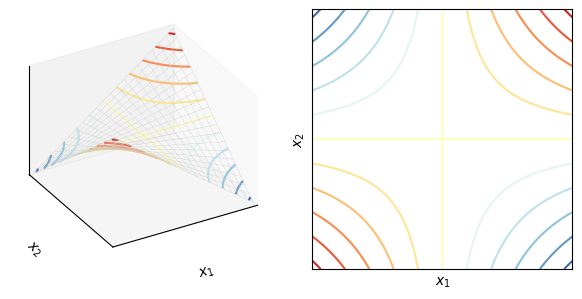

In [99]:
# 生成数据
x1_array = np.linspace(-2, 2, 201)
x2_array = np.linspace(-2, 2, 201)
xx1, xx2 = np.meshgrid(x1_array, x2_array) #  生成网格化数据，代表横纵轴坐标点。

# 定义二元函数
def fcn(A, xx1, xx2):
    x1, x2 = symbols('x1 x2')
    x = np.array([[x1, x2]]).T
    f_x = x.T @ A @ x # 结果为二维数组
    f_x = f_x[0][0]
    print(simplify(expand(f_x)))
    f_x_fcn = lambdify([x1, x2], f_x)
    ff_x = f_x_fcn(xx1, xx2)

    return ff_x

# 不定矩阵
A = np.array([[0, 1],
              [1, 0]])
f2_array = fcn(A, xx1, xx2)
visualize(xx1, xx2, f2_array)

矩阵分解

In [101]:
from sympy import Matrix,symbols
a, b, c, d = symbols('a b c d')
A = Matrix([[a**2, 2*a*b*c],
            [2*a*b*c, b**2]])
# 特征值  特征向量
A.eigenvals(), A.eigenvects()

({a**2/2 + b**2/2 - sqrt(a**4 + 16*a**2*b**2*c**2 - 2*a**2*b**2 + b**4)/2: 1,
  a**2/2 + b**2/2 + sqrt(a**4 + 16*a**2*b**2*c**2 - 2*a**2*b**2 + b**4)/2: 1},
 [(a**2/2 + b**2/2 - sqrt(a**4 + 16*a**2*b**2*c**2 - 2*a**2*b**2 + b**4)/2,
   1,
   [Matrix([
    [-b/(2*a*c) + (a**2/2 + b**2/2 - sqrt(a**4 + 16*a**2*b**2*c**2 - 2*a**2*b**2 + b**4)/2)/(2*a*b*c)],
    [                                                                                               1]])]),
  (a**2/2 + b**2/2 + sqrt(a**4 + 16*a**2*b**2*c**2 - 2*a**2*b**2 + b**4)/2,
   1,
   [Matrix([
    [-b/(2*a*c) + (a**2/2 + b**2/2 + sqrt(a**4 + 16*a**2*b**2*c**2 - 2*a**2*b**2 + b**4)/2)/(2*a*b*c)],
    [                                                                                               1]])])])

In [103]:
from sympy import Matrix
A = Matrix([[0, 1],[1, 1],[1, 0]])
# 奇异值分解
U, S, V = A.singular_value_decomposition() 
U, S, V

(Matrix([
 [ sqrt(2)/2, sqrt(6)/6],
 [         0, sqrt(6)/3],
 [-sqrt(2)/2, sqrt(6)/6]]),
 Matrix([
 [1,       0],
 [0, sqrt(3)]]),
 Matrix([
 [-sqrt(2)/2, sqrt(2)/2],
 [ sqrt(2)/2, sqrt(2)/2]]))

In [105]:
V.T @ V, V @ V.T, U.T @ U

(Matrix([
 [1, 0],
 [0, 1]]),
 Matrix([
 [1, 0],
 [0, 1]]),
 Matrix([
 [1, 0],
 [0, 1]]))